In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error ,r2_score

In [7]:
#Data for x and y
np.random.seed(42)
X=2-(3*np.random.normal(0,1,20))
Y=X-2*(X**2)+0.5*(X**3)+np.random.normal(-3,3,20)
print(X,'\n')
print(Y)

[ 0.50985754  2.4147929   0.05693439 -2.56908957  2.70246012  2.70241087
 -2.73763845 -0.30230419  3.40842316  0.37231987  3.39025308  3.39718926
  1.27411319  7.73984073  7.1747535   3.68686259  5.03849336  1.057258
  4.72407223  6.2369111 ] 

[  1.45316436  -5.88438544  -2.74687177 -31.5220563   -6.66884352
  -4.70298397 -34.43878822  -2.37179924  -4.82977006  -3.75419967
  -4.9190262    2.47553613  -3.97893231 113.5845392   88.35592042
  -5.10389986  15.84689605  -9.46644275   5.81902276  47.33436457]


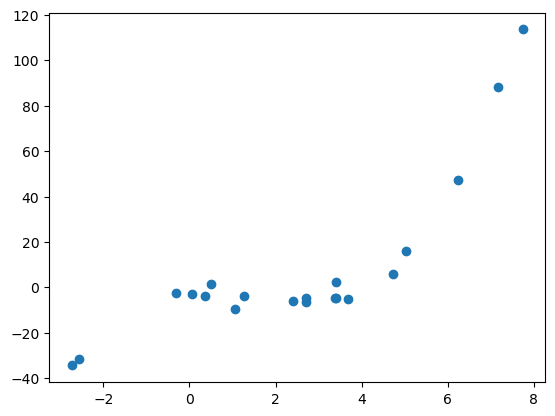

In [9]:
plt.scatter(X,Y)

In [11]:
x=X.reshape(len(X),1)
print(x.shape)

(20, 1)


In [12]:
#Linear regression
lin_reg=LinearRegression()
lin_reg.fit(x,Y)
pred_Y =lin_reg.predict(x)
print('M --',lin_reg.coef_)
print('C---',lin_reg.intercept_)

M -- [10.14488965]
C--- -17.77912210771828


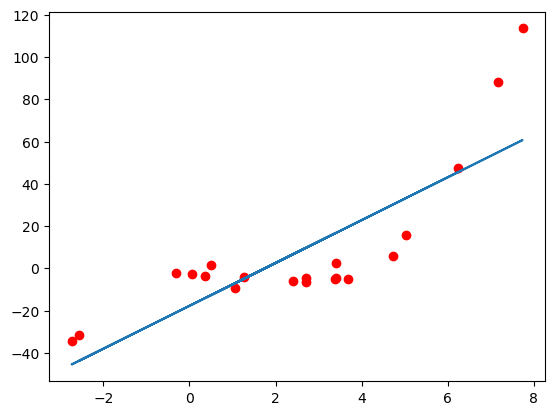

In [14]:
plt.scatter(X,Y,color='r')
plt.plot(X,pred_Y)

In [15]:
print('Accuracy',lin_reg.score(x,Y))

Accuracy 0.6610836932321527


In [18]:
#Degree-2

In [21]:
poly_feature= PolynomialFeatures(degree=2)

#transform data

poly_x=poly_feature.fit_transform(x)

print('Feature Names',poly_feature.get_feature_names())

Feature Names ['1', 'x0', 'x0^2']


C:\Users\siddartha_legala\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(poly_x)
print(poly_x.shape)

[[ 1.00000000e+00  5.09857541e-01  2.59954712e-01]
 [ 1.00000000e+00  2.41479290e+00  5.83122477e+00]
 [ 1.00000000e+00  5.69343857e-02  3.24152427e-03]
 [ 1.00000000e+00 -2.56908957e+00  6.60022121e+00]
 [ 1.00000000e+00  2.70246012e+00  7.30329072e+00]
 [ 1.00000000e+00  2.70241087e+00  7.30302451e+00]
 [ 1.00000000e+00 -2.73763845e+00  7.49466426e+00]
 [ 1.00000000e+00 -3.02304187e-01  9.13878218e-02]
 [ 1.00000000e+00  3.40842316e+00  1.16173484e+01]
 [ 1.00000000e+00  3.72319869e-01  1.38622085e-01]
 [ 1.00000000e+00  3.39025308e+00  1.14938159e+01]
 [ 1.00000000e+00  3.39718926e+00  1.15408949e+01]
 [ 1.00000000e+00  1.27411319e+00  1.62336441e+00]
 [ 1.00000000e+00  7.73984073e+00  5.99051346e+01]
 [ 1.00000000e+00  7.17475350e+00  5.14770878e+01]
 [ 1.00000000e+00  3.68686259e+00  1.35929557e+01]
 [ 1.00000000e+00  5.03849336e+00  2.53864153e+01]
 [ 1.00000000e+00  1.05725800e+00  1.11779448e+00]
 [ 1.00000000e+00  4.72407223e+00  2.23168584e+01]
 [ 1.00000000e+00  6.23691110e+

In [26]:
poly_reg =LinearRegression()
poly_reg.fit(poly_x,Y)
poly_Y=poly_reg.predict(poly_x)

print('Accuracy',poly_reg.score(poly_x,Y))

Accuracy 0.8431195364018239


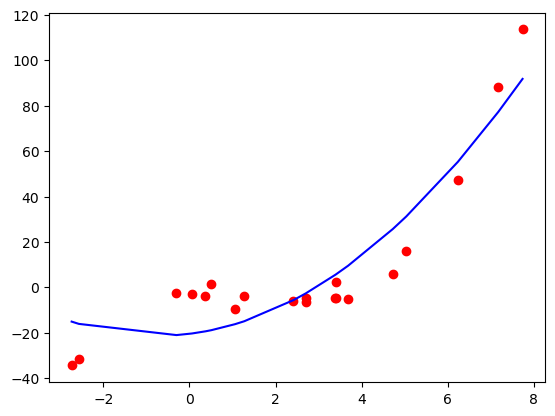

In [30]:
#sort data before plotting
import operator
sort_axis=operator.itemgetter(0)
sorted_zip =sorted(zip(X,poly_Y),key=sort_axis)
data_xsorted,pred_poly_sorted=zip(*sorted_zip)

plt.scatter(x,Y,color='r')
plt.plot(data_xsorted,pred_poly_sorted,color='b')